<a href="https://colab.research.google.com/github/siddharth-haveliwala/Classification-Projects/blob/main/SimpleRNN_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
model = Sequential()

model.add(SimpleRNN(3, input_shape=(4,5)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
# weights of input layer
print(model.get_weights()[0].shape)
model.get_weights()[0]

(5, 3)


array([[ 0.35412568, -0.420659  , -0.12388492],
       [-0.30455148,  0.35604423, -0.00657505],
       [ 0.8255972 ,  0.80070406,  0.68446463],
       [ 0.35472506,  0.79158133,  0.28597265],
       [ 0.04330575,  0.36607796,  0.678649  ]], dtype=float32)

In [4]:
# weights of HL
print(model.get_weights()[1].shape)
model.get_weights()[1]

(3, 3)


array([[-0.17806923, -0.18039535, -0.9673411 ],
       [ 0.77522624,  0.57975316, -0.25082016],
       [ 0.6060658 , -0.7945716 ,  0.03661111]], dtype=float32)

In [5]:
# bias of HL
print(model.get_weights()[2].shape)
model.get_weights()[2]

(3,)


array([0., 0., 0.], dtype=float32)

In [6]:
# weights of output layer
print(model.get_weights()[3].shape)
model.get_weights()[3]

(3, 1)


array([[ 0.22942913],
       [-1.037817  ],
       [-0.27999276]], dtype=float32)

In [7]:
# bias of output layer
print(model.get_weights()[4].shape)
model.get_weights()[4]

(1,)


array([0.], dtype=float32)

### Input data preparation for RNN

In [8]:
import numpy as np

In [9]:
docs = [
    'go india',
    'india india',
    'hip hip hurray',
    'jeetega bhai jeetega india jeetega',
    'bharat mata ki jai',
    'kohli kohli',
    'sachin sachin',
    'dhoni dhoni',
    'modi ji ki jai',
    'inquilab zindabad'
]

In [10]:
# Tokenizing the input docs
# oov_token = out of vocabulary token - in future when new word comes in future while testing then it gets replaced by
# this oov token (kind of placeholder)

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')

In [11]:
# fitting the data on tokenizer

tokenizer.fit_on_texts(docs)

In [12]:
tokenizer.word_index

{'<nothing>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [13]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [14]:
# to get number of sentence count

tokenizer.document_count

10

In [15]:
# Generate sequences for inputs

sequences = tokenizer.texts_to_sequences(docs)
sequences

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [16]:
# Apply padding (we can do either pre text or post text - we do post here)
# Input data is prepared

from tensorflow.keras.utils import pad_sequences

sequences = pad_sequences(sequences, padding='post')
sequences

array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]], dtype=int32)

# Sentiment Analysis - IMDB

In [17]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Flatten

In [18]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [19]:
# No of input data samples

X_train.shape

(25000,)

# Method 1 - Through Integer Encoding

In [20]:
# Integer encoded data

X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [21]:
len(X_train[0])

218

In [22]:
len(X_train[1])

189

In [23]:
from keras.utils import pad_sequences

In [24]:
# Limiting the length of sequence to 100 because this is for learning but however
# due to limiting the length of sequences we are losing information

X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)

In [25]:
X_train.shape

(25000, 100)

In [26]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100, 1), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

- return sequences are set to false then the flow will not place each output out of the HL for understanding the word semantic

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.5012 - loss: 0.7032 - val_accuracy: 0.5100 - val_loss: 0.6932
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5087 - loss: 0.6934 - val_accuracy: 0.5058 - val_loss: 0.6930
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5108 - loss: 0.6932 - val_accuracy: 0.5111 - val_loss: 0.6941
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5068 - loss: 0.6932 - val_accuracy: 0.5045 - val_loss: 0.6940
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.5057 - loss: 0.6933 - val_accuracy: 0.5059 - val_loss: 0.6926


# Method 2 - Through Word Embedding

In [39]:
docs = [
    'go india',
    'india india',
    'hip hip hurray',
    'jeetega bhai jeetega india jeetega',
    'bharat mata ki jai',
    'kohli kohli',
    'sachin sachin',
    'dhoni dhoni',
    'modi ji ki jai',
    'inquilab zindabad'
]

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

In [41]:
tokenizer.fit_on_texts(docs)

In [42]:
len(tokenizer.word_index)

17

In [43]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[9, 1],
 [1, 1],
 [3, 3, 10],
 [2, 11, 2, 1, 2],
 [12, 13, 4, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [14, 15, 4, 5],
 [16, 17]]

In [56]:
from keras.utils import pad_sequences

sequences = pad_sequences(sequences, padding='post')
sequences

array([[ 9,  1,  0,  0,  0],
       [ 1,  1,  0,  0,  0],
       [ 3,  3, 10,  0,  0],
       [ 2, 11,  2,  1,  2],
       [12, 13,  4,  5,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [14, 15,  4,  5,  0],
       [16, 17,  0,  0,  0]], dtype=int32)

In [57]:
model = Sequential()

# Total vocab length, what should be the dimension of dense vector (kind of hyperparameter)

model.add(Embedding(input_dim=17, output_dim=2, input_length=5))

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## on IMDB dataset

In [58]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [59]:
X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)

In [60]:
X_train.shape

(25000, 100)

In [62]:
from keras.layers import Input

In [66]:
model = Sequential()

# limiting vocab count to 10000

model.add(Input(shape=(50, )))
model.add(Embedding(input_dim=10000, output_dim=2))
model.add(SimpleRNN(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 50, 2)          │        20,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 32)             │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,153 (82.63 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.4970 - loss: 0.6950 - val_accuracy: 0.5598 - val_loss: 0.6881
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5894 - loss: 0.6749 - val_accuracy: 0.7332 - val_loss: 0.5703
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7529 - loss: 0.5302 - val_accuracy: 0.8064 - val_loss: 0.4426
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7892 - loss: 0.4568 - val_accuracy: 0.7592 - val_loss: 0.5228
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8400 - loss: 0.3841 - val_accuracy: 0.8095 - val_loss: 0.4265


- Now we can clearly see that the vector embeddings is giving a better accuracy

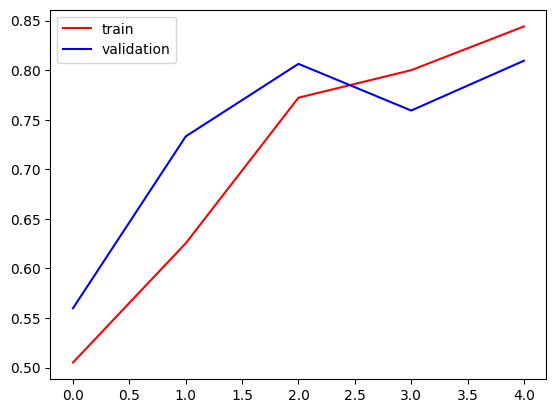

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()